In [175]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed

# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [176]:
import warnings
warnings.simplefilter(action='ignore')

In [177]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [178]:
# pd.set_option('display.max_colwidth', None)
# df[['meta']].head(3)

In [179]:
# pd.reset_option('display.max_colwidth')

# filtered_df = df[df['complex.id'] == 4]
# filtered_df.head(5)

In [180]:
df.info()
# df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [185]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows:",\
      duplicate_rows_df.shape)

Number of duplicated rows: (280, 14)


### Dropping duplicate rows

In [9]:
# # Drop duplicate rows
# df=df.drop_duplicates()
# df.shape

### Dropping missing and null value

In [10]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [11]:
df=df.dropna()
df.shape

(91550, 14)

**After dropping null value**
* Bulleted

In [12]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [13]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'

filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(2)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [14]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [68]:
# df_dash.head(3)

## Installing tcrdist3 package ##

In [16]:
# pip install tcrdist3
# installing tcrdist3

In [17]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')

# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [18]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [19]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [196]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [197]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'vdjdb.score']]

In [198]:
filter=df['vdjdb.score']==0
df=df[~filter]
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2


# Separating data set in to alpha and beta dataframe

# Alpha data frame

In [199]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [200]:
print("alpha chain:", df_alpha.shape)
print("beta chain:", df_beta.shape)

alpha chain: (3890, 10)
beta chain: (8524, 10)


In [201]:
df_alpha.reset_index(drop=True, inplace=True)

In [202]:
#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]

df_alpha.shape

(2965, 10)

In [203]:
filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

df_beta.shape

(2965, 10)

### Removing mouse and monkey

In [204]:
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [205]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [207]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 3889
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       2040 non-null   int64 
 1   gene             2040 non-null   object
 2   cdr3_a_aa        2040 non-null   object
 3   v_a_gene         2040 non-null   object
 4   j_a_gene         1941 non-null   object
 5   species          2040 non-null   object
 6   antigen.epitope  2040 non-null   object
 7   antigen.gene     2012 non-null   object
 8   antigen.species  2040 non-null   object
 9   vdjdb.score      2040 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 175.3+ KB


### Dropping null values   kkkk

In [208]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())

complex.id         0
gene               0
cdr3_a_aa          0
v_a_gene           0
j_a_gene           0
species            0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
dtype: int64


### Dropping duplicates

In [30]:
# df_alpha=df_alpha.drop_duplicates()
# df_alpha.shape

## Run TCRDist on alpha gene dataset

In [209]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

In [210]:
#tcrdist3 create a clone df that matches with the resulting distance matrix, 
#use this to concatnate the distance matrix with the corresponding epitope
tr.clone_df.shape
tr.clone_df.head(5)
clone_df=tr.clone_df

In [211]:
alpha_chain = tr.pw_alpha
alpha_chain

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

You must scale the matrix before loading into tcrdist

In [34]:
# # Scaling the matrix

# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# alpha_scaled_df = std_scaler.fit_transform(alpha_chain)
# alpha_scaled_df

array([[-6.85043125,  0.25996836, -1.34453912, ...,  0.45159434,
         1.57140706,  0.75231423],
       [-0.34145767, -7.27765796, -0.46037991, ..., -0.45931887,
        -0.3626361 ,  0.15399159],
       [-1.66211897, -0.122375  , -5.97584924, ...,  0.80583836,
         0.60438548,  0.04840524],
       ...,
       [ 0.64903831,  0.4238298 ,  1.01321876, ..., -7.59480565,
        -0.86917121,  0.18918704],
       [ 2.29986495,  1.02465509,  1.3079385 , ..., -0.45931887,
        -7.36203039,  1.06907327],
       [ 0.17737356, -0.06775452, -0.54458555, ..., -0.86416918,
        -0.08634422, -4.49180773]])

In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_alpha = pca.fit_transform(alpha_scaled_df)
pca_alpha.shape

(1913, 2)

In [249]:
alpha_dist_df = pd.DataFrame(pca_alpha, columns =['A', 'B'])
alpha_dist_df

,A,B
0,1.787086,3.648199
1,-8.303628,4.370602
2,-1.919664,-18.641164
3,1.787086,3.648199
4,-8.303628,4.370602
...,...,...
1908,-13.767435,5.626351
1909,30.660090,-18.995922
1910,26.378165,2.663796
1911,35.667086,-7.732936


In [250]:
# combining the columns of the two dataframes
df_concat_a = pd.concat([alpha_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

In [251]:
df_concat_a.shape

(1913, 17)

In [252]:
plot_a_df = df_concat_a[['antigen.species', 'A', 'B']]

In [253]:
# top_10_epitope = plot_a_df['antigen.gene'].value_counts().nlargest(10)
# # convert to list
# list_top10epitopes = top_10_epitope.index.tolist()
# list_top10epitopes

In [254]:
# #Taking in only top 10 epitope gene
# plot_a_df=plot_a_df[plot_a_df['antigen.gene'].isin(list_top10epitopes)]
# plot_a_df['antigen.gene'].value_counts()

In [255]:
# # Plotting using seaborn
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=plot_a_df, x='A', y='B', hue='antigen.gene', palette='viridis', alpha=0.7)

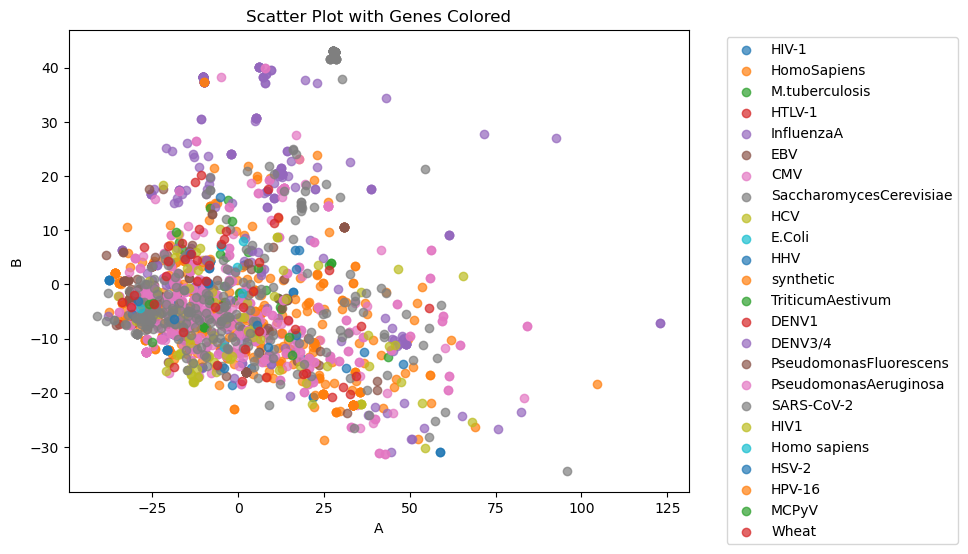

In [256]:
# Plotting
plt.figure(figsize=(8, 6))

# Iterate over unique genes and plot points with the same gene using a unique color
for gene in plot_a_df['antigen.species'].unique():
    subset = plot_a_df[plot_a_df['antigen.species'] == gene]
    plt.scatter(subset['A'], subset['B'], label=gene, alpha=0.7)

# Adding labels and legend
plt.title("Scatter Plot with Genes Colored")
plt.xlabel("A")
plt.ylabel("B")
# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()


In [257]:
# plt.figure(figsize=(8, 6))
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10))
# plt.colorbar(label='Digit Label', ticks=range(10))
# plt.title("MDS Visualization of Digits Dataset")
# plt.xlabel("MDS Dimension 1")
# plt.ylabel("MDS Dimension 2")
# plt.show()

## Implementing UMAP

In [258]:
# pip install umap-learn

In [259]:
from umap import UMAP
import plotly.express as px


In [318]:
umap_2d = UMAP(n_neighbors = 70, n_components=2, init='random', random_state=0, metric='euclidean', min_dist=0.99)
proj_2d = umap_2d.fit_transform(alpha_chain)

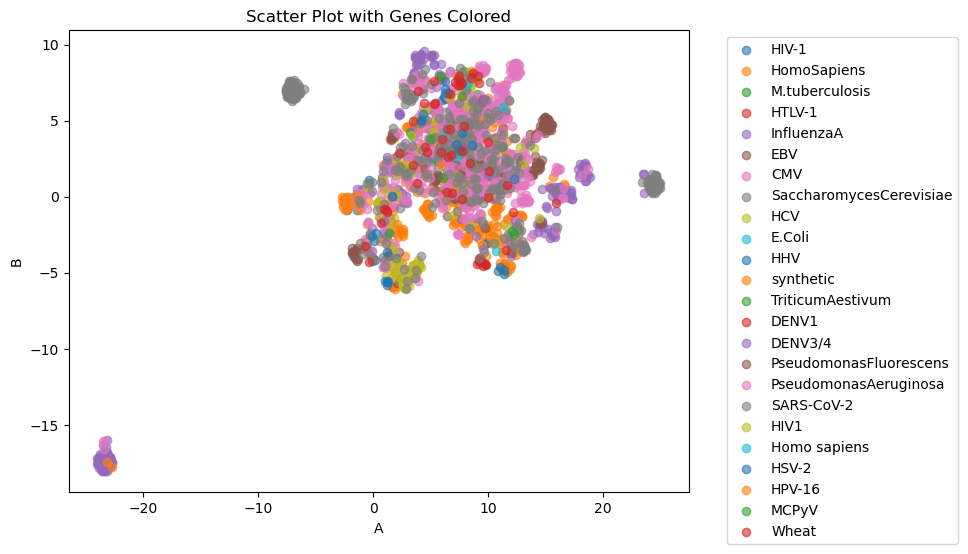

In [319]:
alpha_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a = pd.concat([alpha_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

plot_a_df = df_concat_a[['antigen.species', 'A', 'B']]

# Plotting
plt.figure(figsize=(8, 6))

# Iterate over unique genes and plot points with the same gene using a unique color
for gene in plot_a_df['antigen.species'].unique():
    subset = plot_a_df[plot_a_df['antigen.species'] == gene]
    plt.scatter(subset['A'], subset['B'], label=gene, alpha=0.6)

# Adding labels and legend
plt.title("Scatter Plot with Genes Colored")
plt.xlabel("A")
plt.ylabel("B")
# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [308]:
umap_3d = UMAP(n_neighbors = 70, n_components=3, init='random', random_state=0, metric='euclidean', min_dist=0.99)
proj_3d = umap_3d.fit_transform(alpha_chain)

proj_3d

array([[ 5.9252644, 11.0477495,  4.0960097],
       [ 4.9166894, 11.346997 ,  2.1614292],
       [10.570657 ,  6.6409945,  2.2963426],
       ...,
       [ 5.2401333,  8.547051 ,  3.8207593],
       [ 5.551649 ,  7.5112863,  1.1007384],
       [ 0.9978035, 12.565983 , -1.6449822]], dtype=float32)

In [312]:
import plotly.express as px

fig = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df_concat_a['antigen.species'], labels={'color': 'species'}
)
fig.update_traces(marker_size=3)
fig.show()

## T-SNE


In [310]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(alpha_chain)
tsne.kl_divergence_

0.6271136999130249

In [314]:
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=df_concat_a['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()


In [317]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(alpha_chain)


import plotly.express as px

fig = px.scatter_3d(
    X_tsne, x=0, y=1, z=2,
    color=df_concat_a['antigen.species'], labels={'color': 'species'}
)
fig.update_traces(marker_size=3)
fig.show()

# Beta data frame - human

In [46]:
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [47]:
df_beta['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [48]:
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [49]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6568 entries, 1 to 92768
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       6568 non-null   int64 
 1   gene             6568 non-null   object
 2   cdr3_b_aa        6568 non-null   object
 3   v_b_gene         6568 non-null   object
 4   j_b_gene         6568 non-null   object
 5   species          6568 non-null   object
 6   antigen.epitope  6568 non-null   object
 7   antigen.gene     6568 non-null   object
 8   vdjdb.score      6568 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 513.1+ KB


In [50]:
df_beta=df_beta.dropna()
print(df_beta.isnull().sum())

complex.id         0
gene               0
cdr3_b_aa          0
v_b_gene           0
j_b_gene           0
species            0
antigen.epitope    0
antigen.gene       0
vdjdb.score        0
dtype: int64


In [51]:
# df_beta=df_beta.drop_duplicates()
# df_beta.shape

In [52]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

In [53]:
print(tr.pw_beta.shape)

(5263, 5263)


## Create data frame with alpha and beta chain

In [54]:
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [55]:
df_alpha = df_alpha[df_alpha['complex.id'] != 0].reset_index(drop=True)
df_beta = df_beta[df_beta['complex.id'] != 0].reset_index(drop=True)

In [56]:
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
df_merge.shape

(2739, 17)

In [57]:
df_merge.drop(['species_y'], axis=1, inplace=True)

In [58]:
df_merge.species_x.value_counts()

HomoSapiens    1840
MusMusculus     899
Name: species_x, dtype: int64

In [59]:
filter=df_merge['species_x']=='MusMusculus'
df_merge[~filter].reset_index(drop=True, inplace=True)
df_merge.head()

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,antigen.epitope_x,antigen.gene_x,vdjdb.score_x,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope_y,antigen.gene_y,vdjdb.score_y
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,2
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,2
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,2,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL,Nef,2
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,2
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,2


In [60]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 0 to 2738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   complex.id         2739 non-null   int64 
 1   gene_x             2739 non-null   object
 2   cdr3_a_aa          2739 non-null   object
 3   v_a_gene           2739 non-null   object
 4   j_a_gene           2739 non-null   object
 5   species_x          2739 non-null   object
 6   antigen.epitope_x  2739 non-null   object
 7   antigen.gene_x     2739 non-null   object
 8   vdjdb.score_x      2739 non-null   int64 
 9   gene_y             2739 non-null   object
 10  cdr3_b_aa          2739 non-null   object
 11  v_b_gene           2739 non-null   object
 12  j_b_gene           2739 non-null   object
 13  antigen.epitope_y  2739 non-null   object
 14  antigen.gene_y     2739 non-null   object
 15  vdjdb.score_y      2739 non-null   int64 
dtypes: int64(3), object(13)
memory usage: 363.

In [61]:
# df_dash

# df = df_dash[df_dash['subject'].str.contains('mouse')] 
# #search for a specific string in a cell
# #select rows that contain specific text using pandas

### Select only top 10 epitopes

In [62]:
top_10_epitope = df_merge['antigen.epitope_y'].value_counts().nlargest(10)
print(top_10_epitope)

# convert to list
list_top10epitopes = top_10_epitope.index.tolist()

NLVPMVATV         441
SSYRRPVGI         257
GILGFVFTL         246
ASNENMETM         131
SSLENFRAYV        128
SSPPMFRV          105
HGIRNASFI         100
TFEYVSQPFLMDLE     87
GLCTLVAML          70
YLQPRTFLL          64
Name: antigen.epitope_y, dtype: int64


In [63]:
# df_merge=df_merge.drop_duplicates()
# df_merge.shape

### Combined alpha and beta distance

In [64]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

In [65]:
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)

alpha shape: (1877, 1877)
beta shape (1877, 1877)


In [66]:
print("alpha shape:", tr.pw_cdr3_b_aa.shape)
print("beta shape", tr.pw_cdr3_b_aa.shape)

alpha shape: (1877, 1877)
beta shape (1877, 1877)


In [67]:
combined_pw_distance = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa